In [1]:
length = 10
height = (length**2 - (length/2)**2)**0.5
x = [ 0 , length , length/2 , length/2+length ,   length  ,   2*length , (5/2)*length ,  3*length , (7/2)*length  ,  3*length , 4*length ]
y = [ 0 ,   0    , -height  ,     -height     , -2*height ,  -2*height , -height      , -2*height ,  -height      ,   0       , 0 ]
 

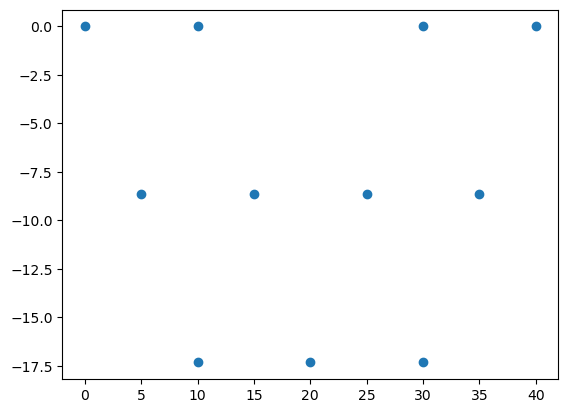

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from utilities import *

In [5]:
coordinates = np.array([x,y]).T
print(coordinates)

[[  0.           0.        ]
 [ 10.           0.        ]
 [  5.          -8.66025404]
 [ 15.          -8.66025404]
 [ 10.         -17.32050808]
 [ 20.         -17.32050808]
 [ 25.          -8.66025404]
 [ 30.         -17.32050808]
 [ 35.          -8.66025404]
 [ 30.           0.        ]
 [ 40.           0.        ]]


Boundaries are specified with a list of lists, where each item in the list defines a boundary in the format:

```
[coordinate_index, boundary_type]
```

Each boundary can be defined using as many nodes as desired, though the boundary will retain its shape regardless of how many times the mesh is refined (this is logical, as refinement only subdivides triangles, thus the sides of a triangle always remain straight).



In [6]:
boundaries = [[['Neumann', +5], [0, 1]],
              [['Neumann',  0], [1, 3, 6, 9]],
              [['Neumann', +5], [9, 10]],
              [['Neumann',  0], [10, 7, 4, 0]]]

In [7]:
mesh = Mesh(coordinates, length, boundaries)
# mesh.define_triangles()
mesh.get_all_sides();

The sides you provided seem to be defined correctly!


In [8]:
mesh.triangles

[[0, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [3, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [6, 8, 9],
 [8, 9, 10]]

In [9]:
len(mesh.triangles)

9

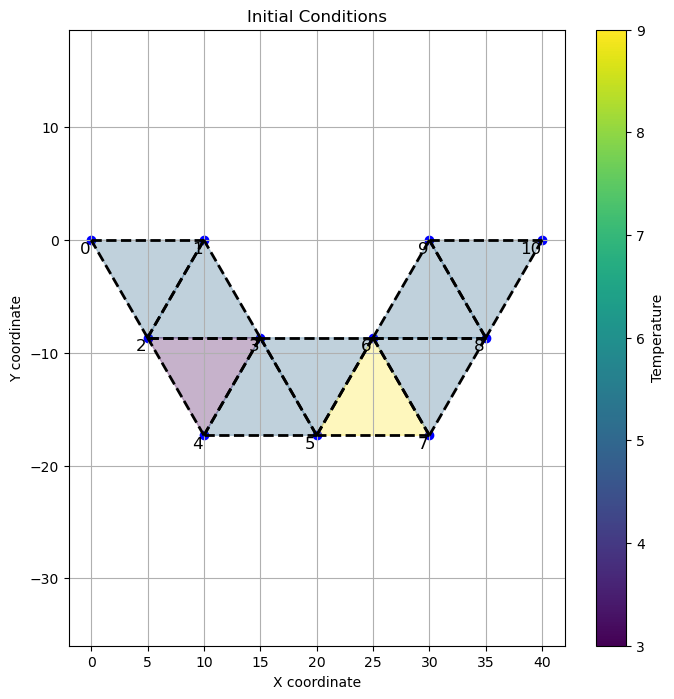

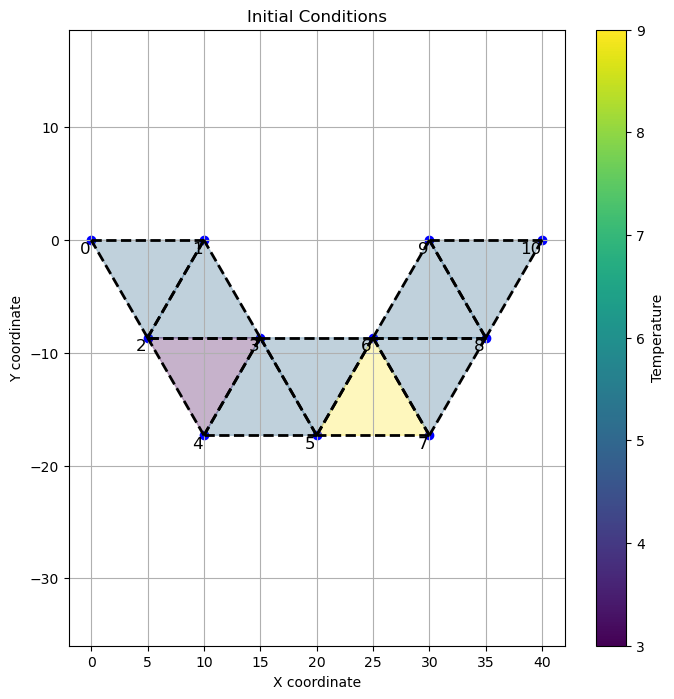

In [ ]:
mesh.set_initial_conditions(default=5, special_triangles=[[2, 3],[5,9]])
mesh.get_initial_conditions()
mesh.plot_triangles(fill_color='initial_conditions');

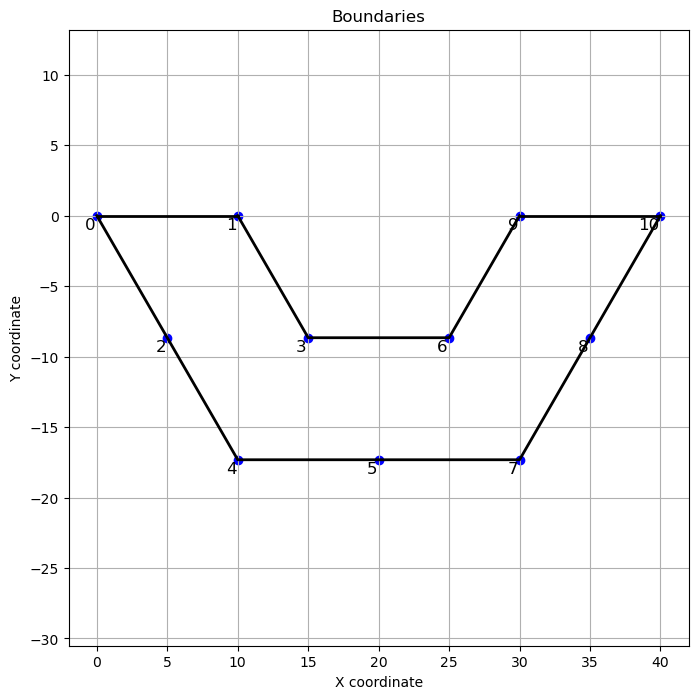

In [11]:
mesh.plot_boundaries();

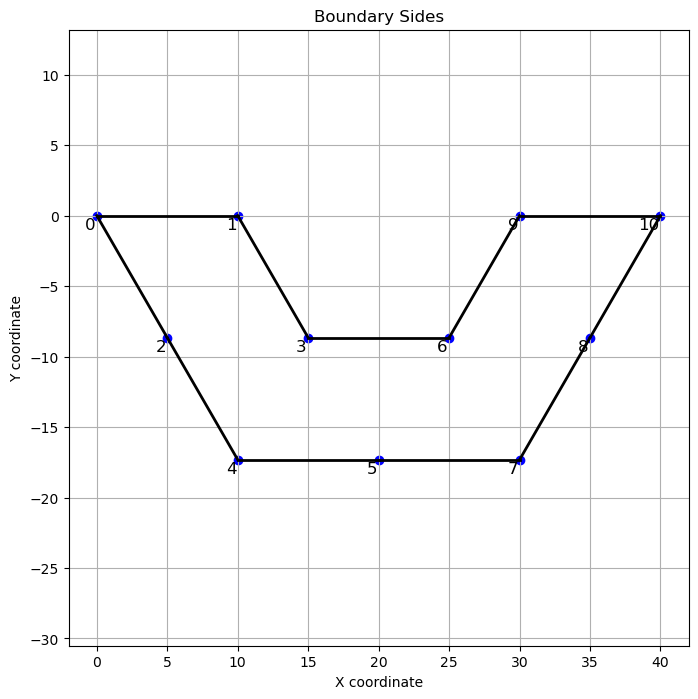

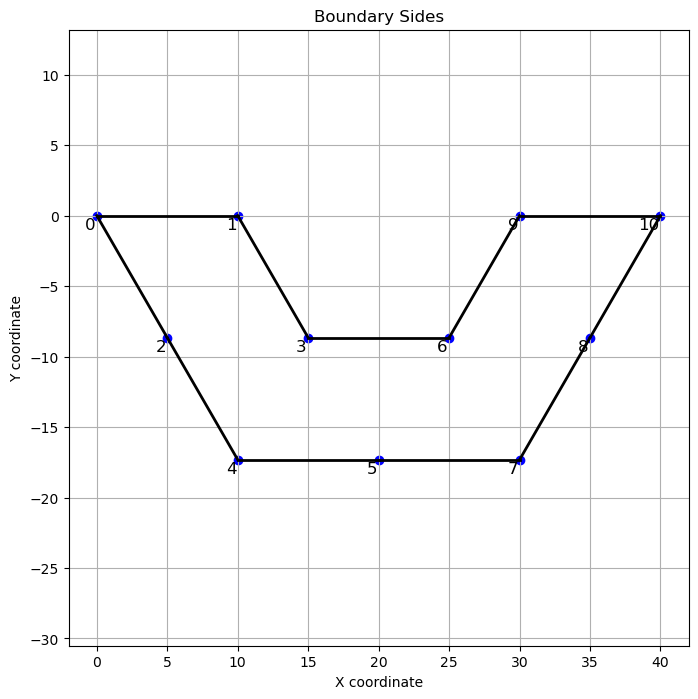

In [12]:
mesh.plot_boundary_sides()

In [13]:
mesh.initial_conditions

array([5., 5., 3., 5., 5., 9., 5., 5., 5.])

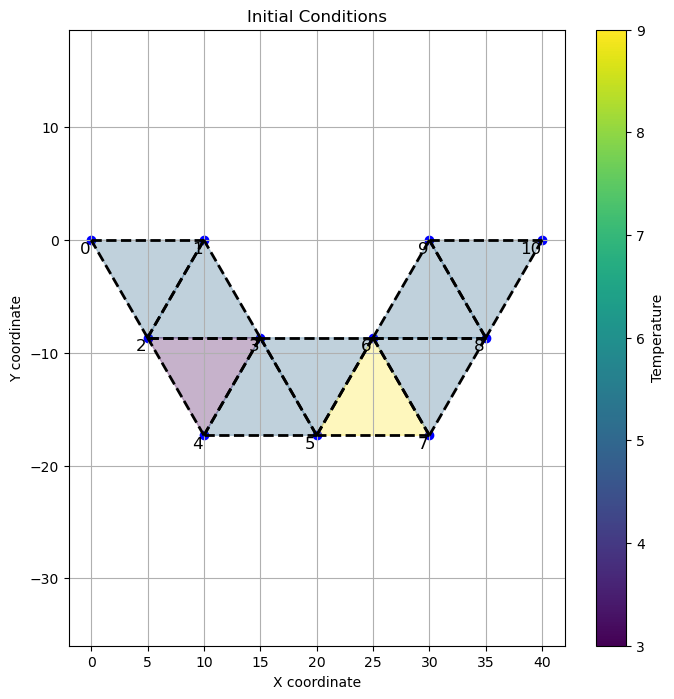

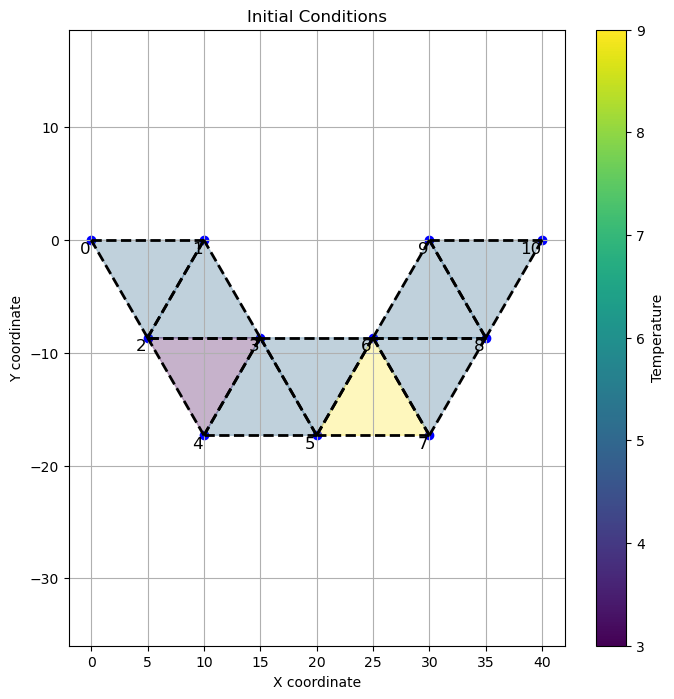

In [14]:
mesh.plot_triangles(fill_color='initial_conditions')

All triangles seem to be defined correctly!


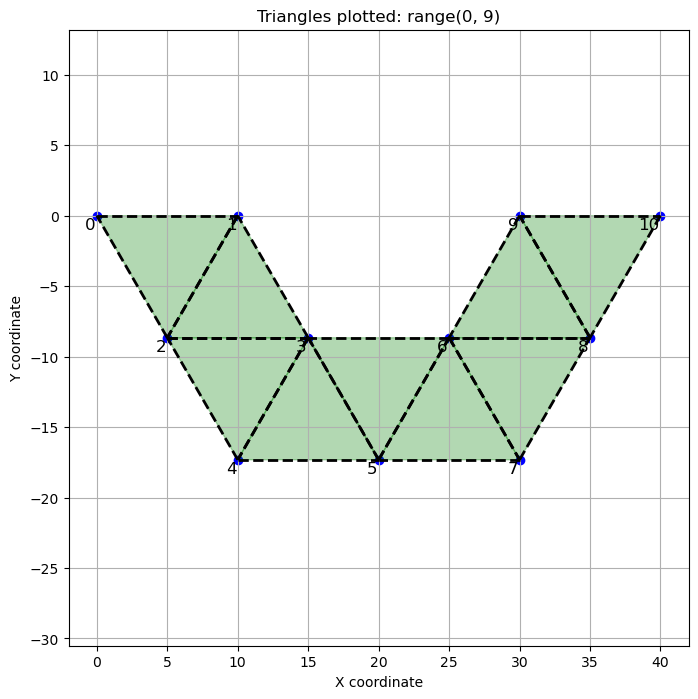

In [15]:
mesh.try_triangles()

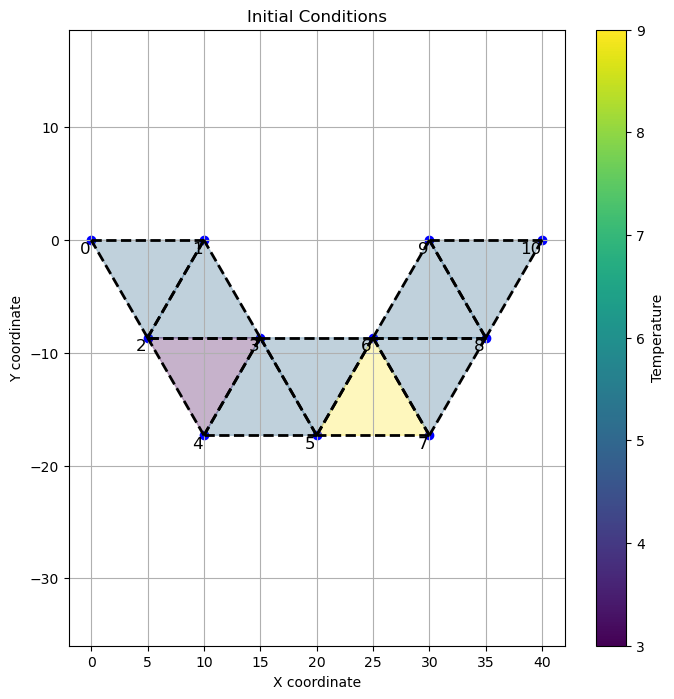

In [16]:
# mesh.refine_mesh()
# mesh.get_initial_conditions()
mesh.plot_triangles(fill_color='initial_conditions');

Solving complete!
  t_final = 20, Nt = 1000, D = 50
NOTE: min value color scale adjusted below min initial value


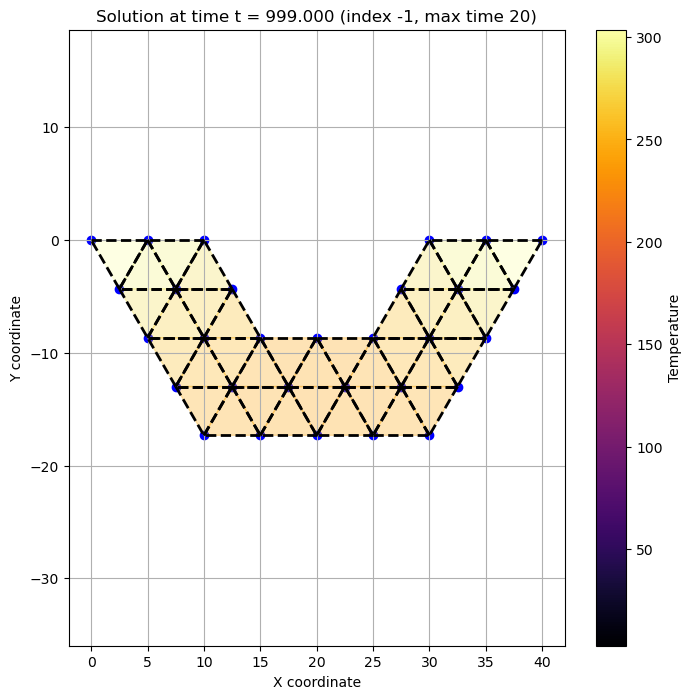

In [31]:
# mesh.set_initial_conditions(default=0, special_triangles=[[0, 10]])

mesh.solve(20, 1000, 50)
mesh.plot_triangles(fill_color='unknowns', time_step=-1,
                    show_labels=False);
# mesh.unknowns[50]

Refining mesh...initial status:
  refinements:  0
  points:       11
  triangles:    9
  sides:        19
  side length:  10
The sides you provided seem to be defined correctly!
Refinement complete...final status:
  refinements:  1
  points:       30
  triangles:    36
  sides:        65
  side length:  5.0
Time taken for refinement: 0.186888 seconds


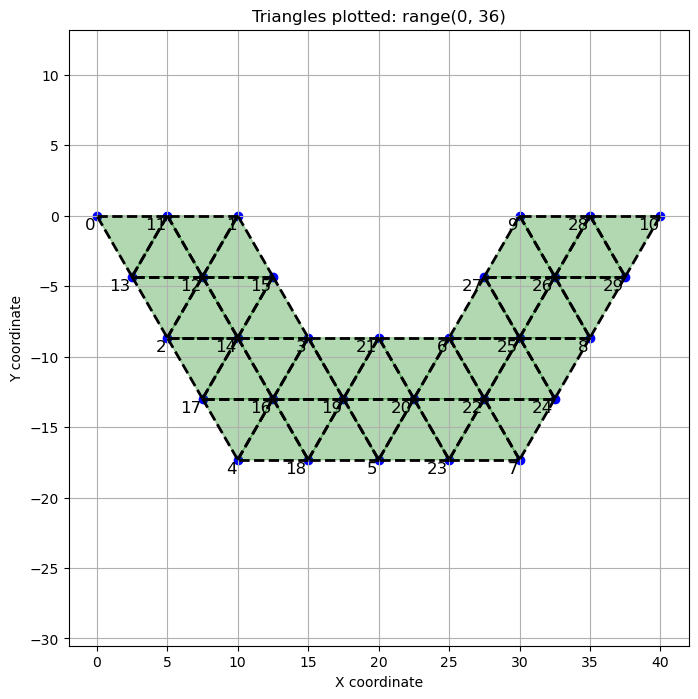

In [25]:
mesh.refine_mesh();
mesh.plot_triangles();

In [19]:
print(mesh.boundary_sides[0])
mesh.all_sides[mesh.boundary_sides[0]]
sorted([11,0])==sorted(mesh.all_sides[mesh.boundary_sides[0]])
len(mesh.boundary_side_types)


0


11